Project Members and Email

* Logan Wongbangchuad - ldellwong1@gmail.com

* Seth Boggess - sethpboggess@gmail.com

* Johnny Woehrle - jpwoehrle@gmail.com

Data Science: CS-4330-010

GitHub Link: https://github.com/LoganWongbangchuad/DataScience

Importing all needed packages below.

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import needed packages for classification

from mlxtend.plotting import plot_decision_regions

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Import packages for visualization of results
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions

# Iport packages for evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics


Grabbing the datasets via url links in our Data Science github repository and merging OriginalDf and PopulationDf where state and year are the same to create "df".

In [ ]:
#This grabs the three data sets from our gethub for use to use in this file

#The main database
url = "https://raw.githubusercontent.com/LoganWongbangchuad/DataScience/main/dataset/NCHS_-_Leading_Causes_of_Death__United_States.csv"
OriginalDf = pd.read_csv(url)

#Database that has the Population of everystate from 1950 to 2019
url2 = "https://raw.githubusercontent.com/LoganWongbangchuad/DataScience/main/dataset/historical_state_population_by_year.csv"
PopulationDf = pd.read_csv(url2)

#Database that has the percentage of obisity of each state in the year 2013
url3 = "https://raw.githubusercontent.com/LoganWongbangchuad/DataScience/main/dataset/LakeCounty_Health_2397514566901885190.csv"
ObesityDf = pd.read_csv(url3)

#Merges the OriginalDf and ObesityDf into one database
df = pd.merge(OriginalDf, PopulationDf, on=['State', 'Year'], how='inner')
df.drop('113 Cause Name', axis=1, inplace=True)

Cleaning the data to get rid of and make df_cleaned dataset:
* District of Columbia (not a state)
* United States (Total of everything from every state)
* All Causes (Total of everything from every cause)
* Encoding Cause Names so they can be introcued into graphs

Creating a new dataset called df_allCauses where only the Cause Name is "All causes".

These steps collectively ensure the dataset maintains appropriate proportions and preserves the integrity of its structure, enabling comprehensive and meaningful analysis.

In [ ]:
#Code that cleans the df taking out columns not needed.
#This also makes two dataframes. df_allCauses is only where Cause type is All Causes and df_cleaned is the rest of the Cause names

# Deleting rows where state is 'District of Columbia'
df_cleaned = df[df['State'] != 'District of Columbia']
df_cleaned = df_cleaned[df_cleaned['State'] != 'United States']
# Deleting rows where 'cause_name' is 'all causes'
df_cleaned = df_cleaned[df_cleaned['Cause Name'] != 'All causes']

df_allCauses = df[df['State'] != 'District of Columbia']
df_allCauses = df_allCauses[df_allCauses['State'] != 'United States']
# Deleting rows where 'cause_name' is not 'all causes'
df_allCauses = df_allCauses[df_allCauses['Cause Name'] == 'All causes']
# Initialize Label Encoder
label_encoder = LabelEncoder()

# Fit and transform the 'Cause Name' column
df_cleaned['Cause Name Encoded'] = label_encoder.fit_transform(df_cleaned['Cause Name'])

df_cleaned.describe()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9500 entries, 0 to 10658
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     9500 non-null   int64  
 1   Cause Name               9500 non-null   object 
 2   State                    9500 non-null   object 
 3   Deaths                   9500 non-null   int64  
 4   Age-adjusted Death Rate  9500 non-null   float64
 5   Population               9500 non-null   int64  
 6   Cause Name Encoded       9500 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 593.8+ KB


**df_cleaned:**

Columns:



*   Year
*   Cause Name
*   State
*   Deaths
*   Age-adjusted Death Rate
*   Population
*   Cause Name Encoded

**Numerical Features:**

Year: 1999-2017

Deaths: 21-2813503

Age-adjusted Death Rate: 2.6-1087.3

Cause Name Encoded Numerically: 0-9

Population: 43000 - 39512223

**Categorical Features:**
Cause Name: Unintentional Injuries, all causes, Alzheimer's disease, stroke, CLRD, Diabetes, Heart Disease, Influenza and pneumonia, Suicide, Cancer, Kidney disease.

State: Unites States, (All 50 states)s



**Df Condensed:**

Df Condensed is the same is df_cleaned, except it takes the mean of Age-adjusted Death Rate, Deaths, and Population.

In [ ]:
#This makes a dataset that averages the Death, population and Age-adjusted Death Rate for each state and cause name
df_condensed = df_cleaned.groupby(['State', 'Cause Name']).agg({
    'Age-adjusted Death Rate': 'mean',
    'Deaths': 'mean',
    'Population' : 'mean'
}).reset_index()

print(df_condensed)

       State               Cause Name  Age-adjusted Death Rate        Deaths  \
0    Alabama      Alzheimer's disease                31.315789   1536.842105   
1    Alabama                     CLRD                52.510526   2698.000000   
2    Alabama                   Cancer               194.773684  10062.631579   
3    Alabama                 Diabetes                26.400000   1332.421053   
4    Alabama            Heart disease               254.447368  12660.157895   
..       ...                      ...                      ...           ...   
495  Wyoming  Influenza and pneumonia                22.431579    117.105263   
496  Wyoming           Kidney disease                11.384211     61.736842   
497  Wyoming                   Stroke                42.726316    223.631579   
498  Wyoming                  Suicide                21.700000    118.368421   
499  Wyoming   Unintentional injuries                56.905263    311.210526   

       Population  
0    4.674425e+06  

The df_condensed dataset is created to consolidate data by averaging the key metric Deaths, Population, and Age-Adjusted Death Rate, for instances where multiple rows share the same State and Cause Name.

**YearObesity:**

The YearObesity data frame takes everything from df cleaned and merges it with another dataframe that contains obesity data from every state for the year 2013

Obesity Range: 20.2 - 36.2

In [ ]:
#This merges ObesityDf and df_cleaned into a dataframe called YearObesity
ObesityDf = ObesityDf[ObesityDf['NAME'] != 'District of Columbia']
ObesityDf = ObesityDf.rename(columns={'NAME': 'State'})
ObesityDf['Year'] = 2013

YearObesity = pd.merge(df_cleaned, ObesityDf, on=['Year', 'State'])
YearObesity.describe()
label_encoder = LabelEncoder()

# Fit and transform the 'Cause Name' column
YearObesity['Cause Name Encoded'] = label_encoder.fit_transform(YearObesity['Cause Name'])
YearObesity = YearObesity.drop(['OBJECTID', 'Shape__Area', 'Shape__Length'], axis=1)

YearObesity

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,Population,Cause Name Encoded,Obesity
0,2013,Unintentional injuries,Alabama,2329,47.2,4830081,9,35.6
1,2013,Unintentional injuries,Alaska,353,52.5,737068,9,29.8
2,2013,Unintentional injuries,Arizona,3349,48.6,6632764,9,28.4
3,2013,Unintentional injuries,Arkansas,1373,44.8,2959400,9,34.5
4,2013,Unintentional injuries,California,11538,29.2,38260787,9,24.2
...,...,...,...,...,...,...,...,...
495,2013,Kidney disease,Virginia,1547,18.0,8252427,6,29.2
496,2013,Kidney disease,Washington,461,6.1,6963985,6,26.4
497,2013,Kidney disease,West Virginia,450,18.6,1853914,6,35.6
498,2013,Kidney disease,Wisconsin,993,14.0,5736754,6,30.7



The YearObesity dataset is created by merging df_cleaned with ObesityDF based on matching Year and State values. This integration allows us to analyze how obesity percentages correlate with various health metrics, providing insights into the impact of obesity on health outcomes.

# (1) Supervised Learning: Choose one of the supervised learning algorithms from K-nearest Neighbors, Naive Bayes, Support Vector Machine, and apply on the consumables usage, showing the effectiveness of the algorithm.

We began by creating a new dataframe that includes only rows where the Cause Name is either "Heart Disease" or "Diabetes."

In [ ]:
ObesityCauses = YearObesity[YearObesity["Cause Name"] != "Unintentional injuries"]
ObesityCauses = ObesityCauses[ObesityCauses["Cause Name"] != "Influenza and pneumonia"]
ObesityCauses = ObesityCauses[ObesityCauses["Cause Name"] != "Suicide"]
ObesityCauses = ObesityCauses[ObesityCauses["Cause Name"] != "CLRD"]
ObesityCauses = ObesityCauses[ObesityCauses["Cause Name"] != "Kidney disease"]
ObesityCauses = ObesityCauses[ObesityCauses["Cause Name"] != "Cancer"]
ObesityCauses = ObesityCauses[ObesityCauses["Cause Name"] != "Heart disease"]
ObesityCauses = ObesityCauses[ObesityCauses["Cause Name"] != "Alzheimer's disease"]


We executed code to display the two selected columns, ensuring a clear and focused view of the relevant data for analysis.

In [ ]:
print(ObesityCauses["Cause Name"].unique())

['Stroke' 'Diabetes']


We created the causeKnnClassifier using the k-Nearest Neighbors (k-NN) algorithm with 5 neighbors. The features (X) were chosen as Obesity and Age-Adjusted Death Rate, while the target variable (y) was set to Cause Name.

To prepare the data for the model:

* **Train-Test Split:** The dataset was divided into training and testing subsets to evaluate the model's performance on unseen data.
* **Scaling:** The training data was scaled to standardize the feature values, ensuring that all variables contribute equally to the distance calculations used in the k-NN algorithm.
* **Model Training:** The classifier was trained using the scaled training data to learn the relationship between the features and the target variable.

Finally, the model was used to make predictions, enabling classification of causes based on obesity levels and age-adjusted death rates.

In [ ]:
causeKnnClassifier = KNeighborsClassifier(n_neighbors=5)
# Split data
X = ObesityCauses[['Obesity', 'Age-adjusted Death Rate']]
y = ObesityCauses[['Cause Name']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train model and make predictions for the test set.
causeKnnClassifier.fit(X_train_scaled, np.ravel(y_train))
y_pred = causeKnnClassifier.predict(scaler.transform(X_test))

To evaluate the causeKnnClassifier, we tested it with a hypothetical scenario where the Obesity level was set to 26 and the Age-Adjusted Death Rate was set to 10. This test input was provided to the trained model, which then predicted the most likely Cause Name based on the relationship it had learned during training. This process demonstrates the model's ability to classify causes using specific health-related metrics.

In [ ]:
# Predict one cause
cause = pd.DataFrame(data={'Obesity': [26], 'Age-adjusted Death Rate': [10]})
causeKnnClassifier.predict(scaler.transform(cause))

array(['Diabetes'], dtype=object)

I then computed the metrics for accuracy and confusion matrix

In [ ]:
# Compute metrics
print(metrics.accuracy_score(y_pred, y_test))
print(metrics.confusion_matrix(y_pred, y_test))

0.9666666666666667
[[14  0]
 [ 1 15]]


Next, we selected a sample from the ObesityCauses DataFrame to evaluate the model further.

In [ ]:
# Take a sample to keep runtime low while seeing what areas are classified as each cause
causeSample = ObesityCauses.sample(50, random_state=123)
causeSample.describe()

,Year,Deaths,Age-adjusted Death Rate,Population,Cause Name Encoded,Obesity
count,50.0,50.000000,50.000000,5.000000e+01,50.00000,50.000000
mean,2013.0,2598.720000,28.214000,8.129814e+06,4.84000,29.458000
std,0.0,2739.872253,9.238739,8.391938e+06,2.01383,3.902699
min,2013.0,189.000000,14.100000,7.220360e+05,3.00000,20.200000
25%,2013.0,706.750000,20.525000,2.909759e+06,3.00000,26.000000
50%,2013.0,1726.500000,26.300000,5.981952e+06,3.00000,30.050000
75%,2013.0,3381.250000,35.275000,9.957626e+06,7.00000,32.325000
max,2013.0,13698.000000,48.100000,3.826079e+07,7.00000,35.600000


After selecting the sample, we proceeded to encode the two causes, "Stroke" and "Diabetes," into numerical values.

In [ ]:
# Create integer-valued labels for plot_decision_regions()
causeSample['Int'] = causeSample['Cause Name'].replace(
    to_replace = ['Stroke',  'Diabetes'],
    value = [int(0), int(1)]
).astype(int) # Explicitly convert the 'Int' column to integer type

# Define input and output features
X = causeSample[['Obesity', 'Age-adjusted Death Rate']]
y = causeSample[['Int']]

# Fit model
causeKnnClassifier.fit(X, np.ravel(y))

KNeighborsClassifier()

Finally, we visualized the results by plotting the decision boundaries created by the causeKnnClassifier.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


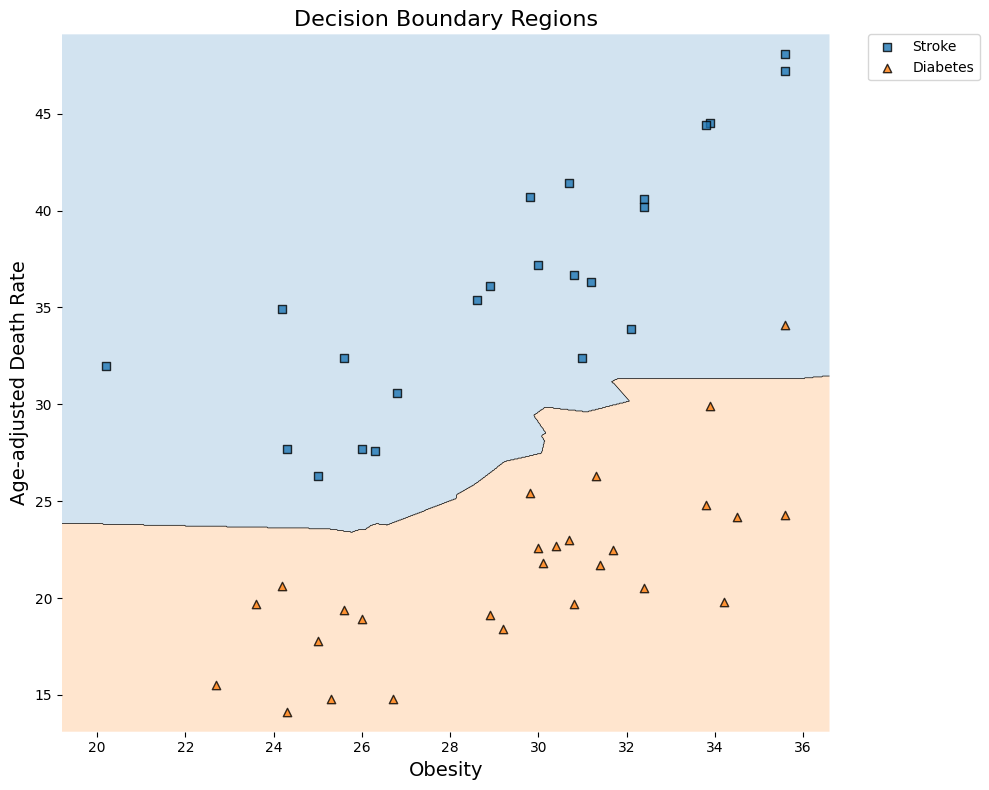

In [ ]:

# Set figure size
plt.figure(figsize=(10, 8))  # Adjust width and height

# Set background opacity to 20%
contourf_kwargs = {'alpha': 0.2}

# Plot decision boundary regions
p = plot_decision_regions(X.to_numpy(), np.ravel(y), clf=causeKnnClassifier, contourf_kwargs=contourf_kwargs)

# Add title and axis labels
p.set_xlabel('Obesity', fontsize=14)
p.set_ylabel('Age-adjusted Death Rate', fontsize=14)

# Add legend and position it outside the plot
L = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
L.get_texts()[0].set_text('Stroke')
L.get_texts()[1].set_text('Diabetes')

# Add title
plt.title("Decision Boundary Regions", fontsize=16)

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


This plot effectively highlights the impact of Obesity and Age-Adjusted Death Rate on the prediction of causes, specifically "Stroke" and "Diabetes." From the visualization, we can observe several key insights:

* **Age-Adjusted Death Rate and Cause Prediction:** The model predicts that higher Age-Adjusted Death Rates are associated with "Stroke," while lower rates are linked to "Diabetes." This suggests a clear boundary where the model distinguishes between the two causes based on the death rate.

* **Obesity and Death Rate Relationship:** The plot reveals a linear trend:as the Obesity level increases, the Age-Adjusted Death Rate also increases. This indicates a potential correlation between obesity and higher mortality rates.

* **Model's Classification Accuracy:** We can observe one data point from the "Diabetes" class that is incorrectly classified. This misclassification could stem from the model not overfitting the data.

Overall, this analysis demonstrates the effectiveness of the classifier while also acknowledging potential areas for improvement, such as handling edge cases more accurately.

# (2) Unsupervised Learning: Choose one of the unsupervised learning algorithms from K-means clustering or hierarchical Clustering, and apply on the consumables usage dataset, showing the effectiveness of the algorithm.

This code utilizes the YearObesity dataset, selecting only the Age-adjusted Death Rate and Obesity features. It then applies the k-Means clustering algorithm to group the data into clusters based on these two features. Additionally, the code determines the optimal number of clusters, which identifies that the data should be divided into two clusters.

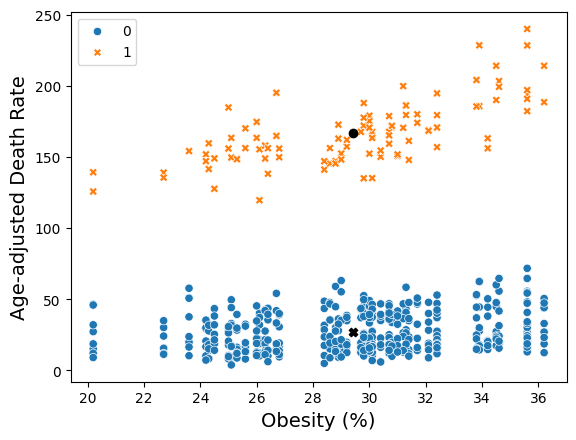

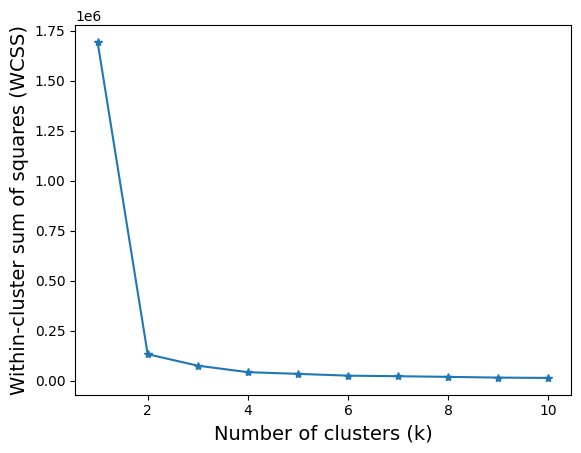

In [ ]:
# Initialize a k-means model with k=2
kmModel = KMeans(n_clusters=2)

#making a new dataframe that has only Age-adjusted Death Rate and Obesity for the kmModel
unsupervisedDf = YearObesity[['Obesity', 'Age-adjusted Death Rate']]


# Fit the model
kmModel = kmModel.fit(unsupervisedDf)

# Save the cluster centroids
centroids = kmModel.cluster_centers_
centroids[1]

# Save the cluster assignments
clusters = kmModel.fit_predict(unsupervisedDf[['Obesity', 'Age-adjusted Death Rate']])

# View the clusters for the first five instances
clusters[0:5]

# Plot clusters
p = sns.scatterplot(
    data=unsupervisedDf, x='Obesity', y='Age-adjusted Death Rate', hue=clusters, style=clusters
)
p.set_xlabel('Obesity (%)', fontsize=14);
p.set_ylabel('Age-adjusted Death Rate', fontsize=14);

# Add centroid for cluster 0
plt.scatter(x=centroids[0, 0], y=centroids[0, 1], c='black')
# Add centroid for cluster 1
plt.scatter(x=centroids[1, 0], y=centroids[1, 1], c='black', marker='X')

# Fit k-means clustering with k=1,...,5 and save WCSS for each
WCSS = []
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for j in k:
    kmModel = KMeans(n_clusters=j)
    kmModel = kmModel.fit(unsupervisedDf)
    WCSS.append(kmModel.inertia_)

    # Plot the WCSS for each cluster
ax = plt.figure().gca()
plt.plot(k, WCSS, '*-')
plt.xlabel('Number of clusters (k)', fontsize=14);
plt.ylabel('Within-cluster sum of squares (WCSS)', fontsize=14);

This analysis indicates that the optimal number of clusters for the given dataset, using unsupervised learning (k-Means), is two. Since the data points are closely intertwined, the resulting clusters are not sharply distinct. As a result, the model's predictions are limited to two broad categories:

* **Orange Group (Cluster 1):** This group represents causes related to Cancer or Heart Disease, as they are more closely associated with the patterns observed in the data.

* **Blue Group (Cluster 2):** This group encompasses all other causes of death, distinct from the heart disease and cancer-related causes.

# Conclusion

Overall, the analysis began by focusing on two specific causes, "Heart Disease" and "Diabetes," by creating a new dataframe that included only these rows. We then processed the data, making key adjustments such as removing irrelevant entries (like "District of Columbia" and "United States") and encoding categorical variables like Cause Name. The k-Nearest Neighbors (k-NN) model was employed to classify the data based on features like Obesity levels and the Age-Adjusted Death Rate.

We evaluated the model by testing it with specific input values, such as an obesity level of 26 and an age-adjusted death rate of 10. The results highlighted how the model classified different causes based on these health metrics. Subsequently, we performed clustering on the YearObesity dataset using k-Means to examine patterns between obesity levels and death rates, ultimately determining that two clusters were optimal for this data.

The final visualizations of decision boundaries demonstrated how the Age-Adjusted Death Rate and Obesity levels influenced the classification of "Stroke" and "Diabetes." We observed a clear trend, where higher death rates were associated with "Stroke," while lower rates were linked to "Diabetes." However, the model also showed some misclassifications, indicating that there may be room for improvement, especially in handling edge cases. We also analyzed that the optimal number of clusters using unsupervised learning (k-Means), is two.